In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('./assets//DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [18]:
df.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [19]:
df["date"] = pd.to_datetime(df["date"])

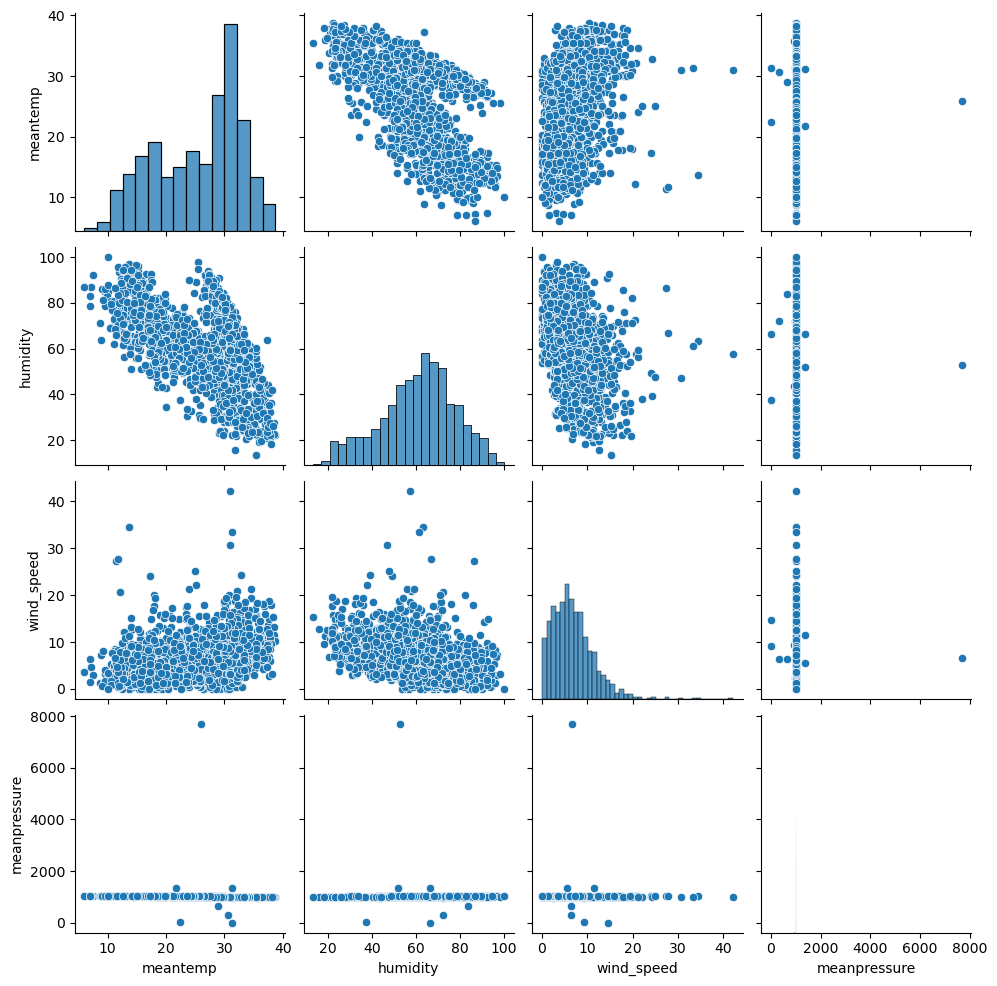

In [20]:
sns.pairplot(df)

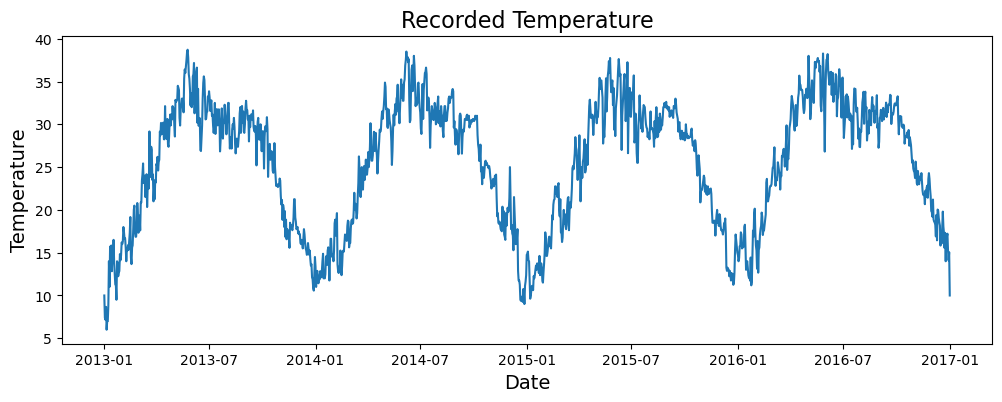

In [21]:
f = plt.figure(figsize=(12,4))

ax = f.add_subplot(111)
sns.lineplot(data=df, x='date', y='meantemp')
plt.title("Recorded Temperature", fontsize=16)
plt.ylabel("Temperature", fontsize=14)
plt.xlabel("Date", fontsize=14)

plt.show()

In [ ]:
plt.figure(figsize=(18, 8))

dates = df.date.iloc[:-1]

print("Temperature Years on Record: ", *dates.dt.year.unique())
for i in dates.dt.year.unique():
    sns.lineplot(df['meantemp'].iloc[:-1][dates.dt.year==i].values, label=i)
    
plt.xlabel("Month", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, 365, 32), labels=dates.dt.month_name().unique(), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Recorded Temperature (Years Comparison)", fontsize=16)
plt.legend(fontsize=12)
plt.show()

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

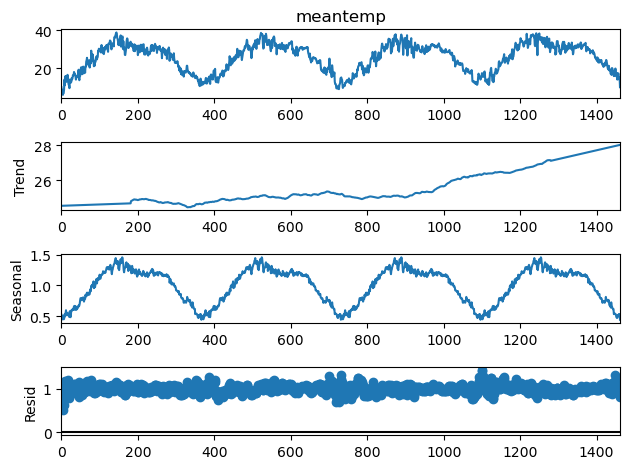

In [23]:
# Multiplicative Decomposition 
decomp_mul = seasonal_decompose(df['meantemp'], model='multiplicative', extrapolate_trend='freq', period=365)
decomp_mul.plot()
plt.show()

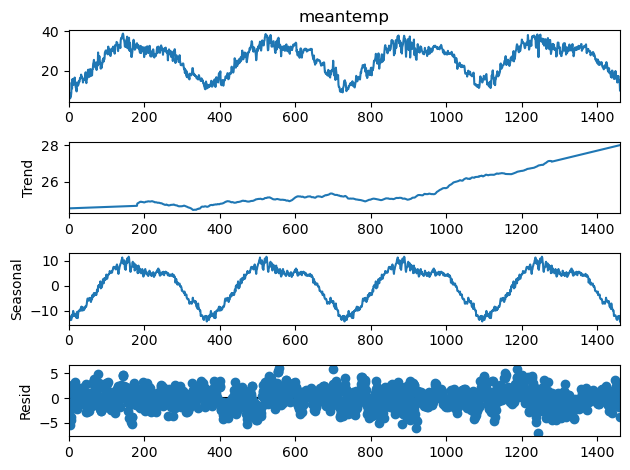

In [24]:
# Additive Decomposition
decomp_add = seasonal_decompose(df['meantemp'], model='additive', extrapolate_trend='freq', period=365)
decomp_add.plot()
plt.show()

In [25]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


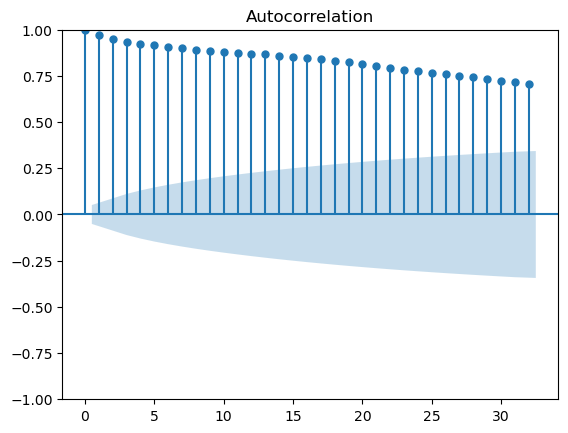

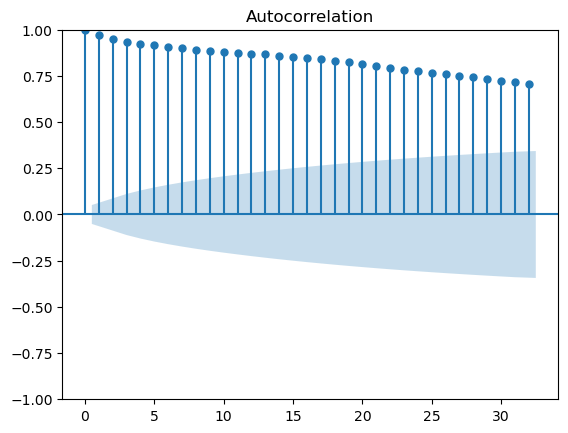

In [26]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df.meantemp)

In [51]:
df["diff_temp"] = df["meantemp"].diff()
#df["diff_temp"].iloc[0] = 0
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,diff,diff_temp
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,-2.600000,-2.600000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,-0.233333,-0.233333
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1.500000,1.500000
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,-2.666667,-2.666667


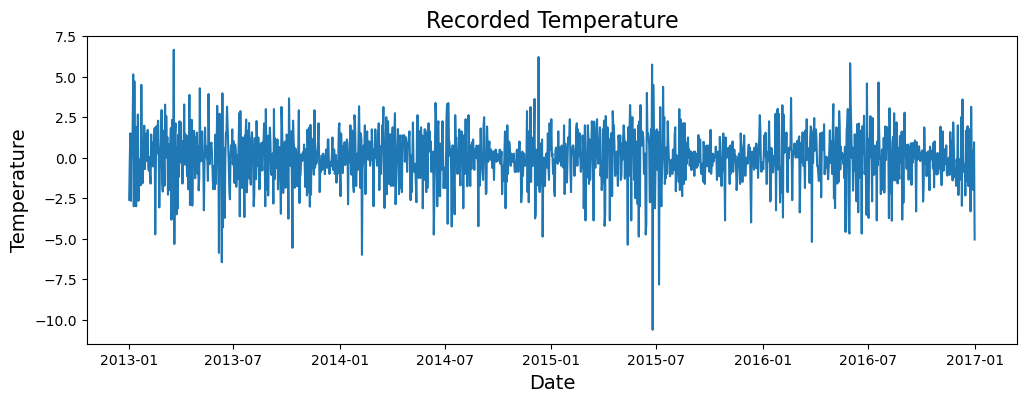

In [52]:
f = plt.figure(figsize=(12,4))

ax = f.add_subplot(111)
sns.lineplot(data=df.dropna(), x='date', y='diff_temp')
plt.title("Recorded Temperature", fontsize=16)
plt.ylabel("Temperature", fontsize=14)
plt.xlabel("Date", fontsize=14)

plt.show()

In [49]:
df["diff_temp"].describe()

count    1462.000000
mean        0.000000
std         1.670899
min       -10.625000
25%        -0.875000
50%         0.052083
75%         1.000000
max         6.666667
Name: diff_temp, dtype: float64

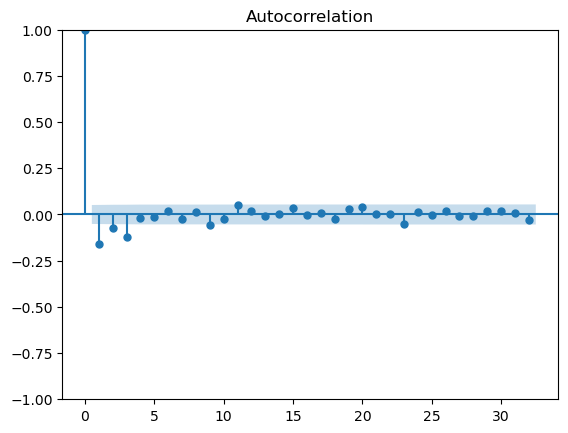

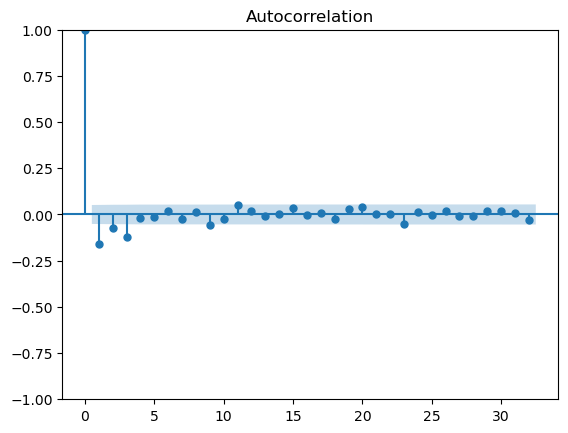

In [53]:
plot_acf(df["diff_temp"].dropna())

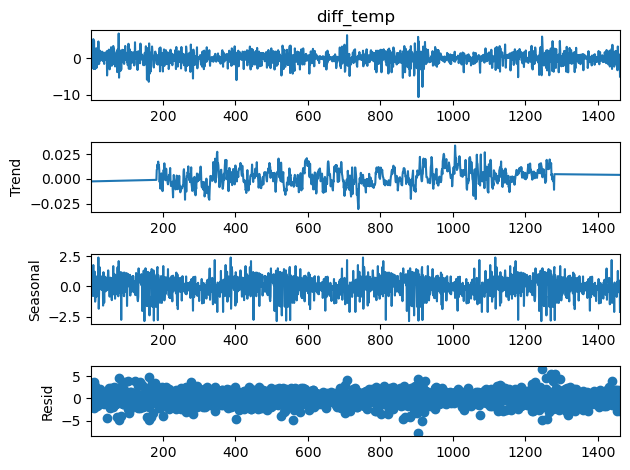

In [55]:
# Additive Decomposition
decomp_add = seasonal_decompose(df['diff_temp'].dropna(), model='additive', extrapolate_trend='freq', period=365)
decomp_add.plot()
plt.show()

In [58]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df["meantemp"].dropna())
print(result[1])

result = adfuller(df["diff_temp"].dropna())
print(result[1])

# First diff is enough

0.27741213723016156
2.764863137594288e-29


In [ ]:
# First lag most significant so the order of the AR (p) is 1

In [72]:
from statsmodels.tsa.arima.model import ARIMA

#df.set_index("date", inplace=True)

arima_model = ARIMA(df["meantemp"], order=(1,1,1))
model = arima_model.fit()
model.summary()

/Users/ssotomayorba/miniconda3/envs/micromaster/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ssotomayorba/miniconda3/envs/micromaster/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ssotomayorba/miniconda3/envs/micromaster/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2768.239
Date:                Mon, 03 Apr 2023   AIC                           5542.478
Time:                        11:58:54   BIC                           5558.339
Sample:                    01-01-2013   HQIC                          5548.395
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5728      0.046     12.494      0.000       0.483       0.663
ma.L1         -0.8028      0.036    -22.070      0.000      -0.874      -0.731
sigma2         2.5896      0.072     36.204      0.000       2.449       2.730
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               255.47
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.46
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

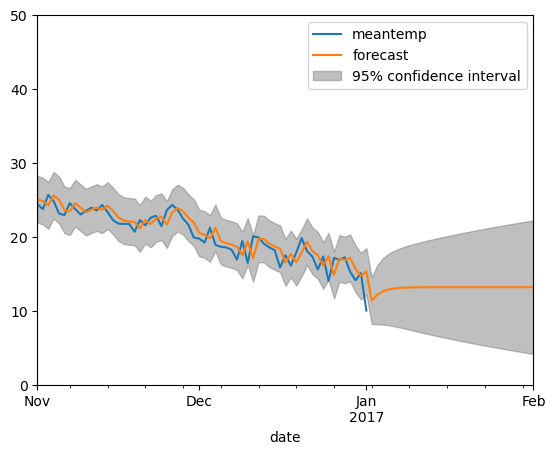

In [103]:
from statsmodels.graphics.tsaplots import plot_predict

ax = plt.gca()
ax.set_ylim([0, 50])
ax = df["meantemp"].loc['2016-11-01':].plot(ax=ax)
plot_predict(model, start='2016-11-01', end='2017-02-01', dynamic=False, ax=ax)
plt.show()

In [79]:
df.head()

,meantemp,humidity,wind_speed,meanpressure,diff,diff_temp
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,-2.600000,-2.600000
2013-01-03,7.166667,87.000000,4.633333,1018.666667,-0.233333,-0.233333
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1.500000,1.500000
2013-01-05,6.000000,86.833333,3.700000,1016.500000,-2.666667,-2.666667


In [111]:
a = model.get_forecast('2017-01-02')
a.predicted_mean
a.conf_int(alpha=0.05)

,lower meantemp,upper meantemp
2017-01-02,8.200419,14.508411


In [97]:
df.tail()

,meantemp,humidity,wind_speed,meanpressure,diff,diff_temp
date,,,,,,
2016-12-28,17.217391,68.043478,3.547826,1015.565217,0.367391,0.367391
2016-12-29,15.238095,87.857143,6.000000,1016.904762,-1.979296,-1.979296
2016-12-30,14.095238,89.666667,6.266667,1017.904762,-1.142857,-1.142857
2016-12-31,15.052632,87.000000,7.325000,1016.100000,0.957393,0.957393
2017-01-01,10.000000,100.000000,0.000000,1016.000000,-5.052632,-5.052632


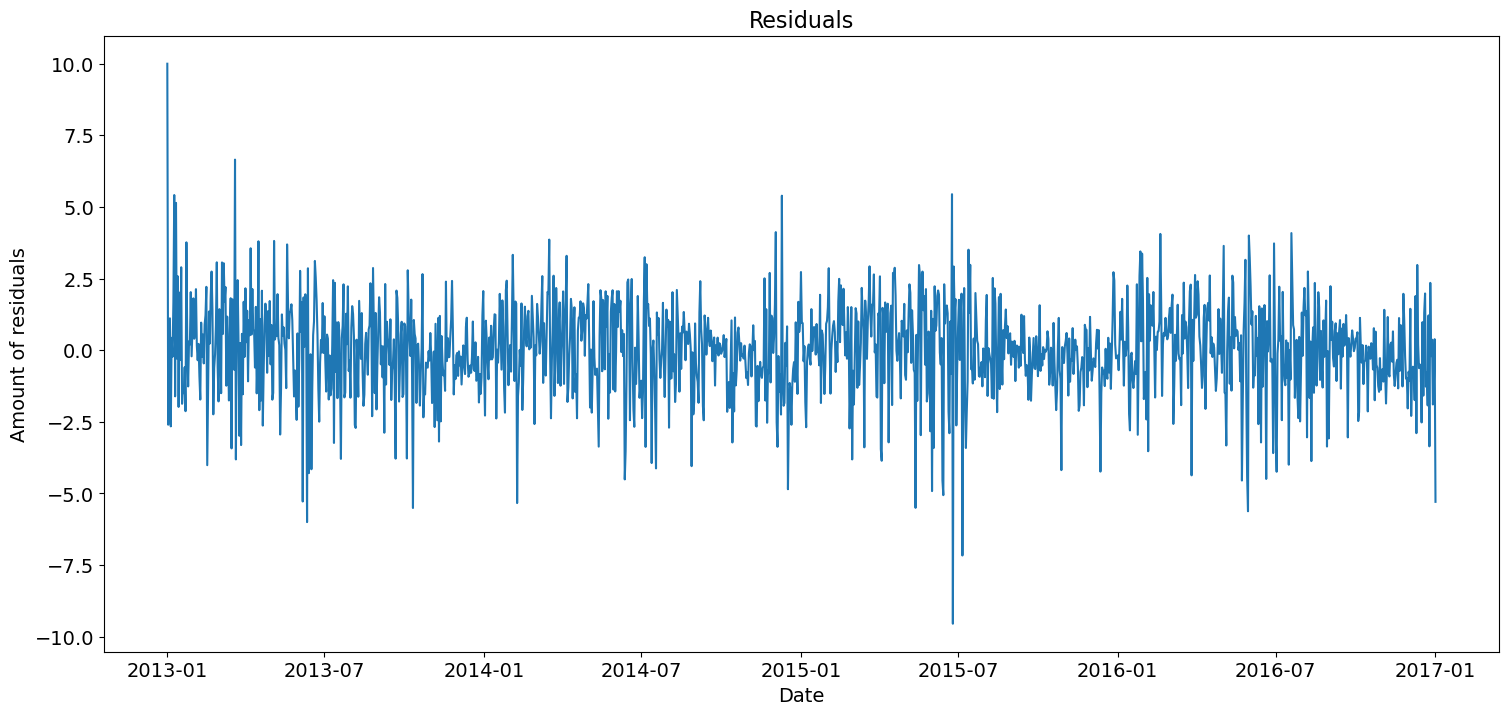

In [121]:
residuals = pd.DataFrame(model.resid)
plt.figure(figsize=(18, 8))
plt.plot(residuals)
plt.title('Residuals', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Amount of residuals", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<Figure size 1800x800 with 0 Axes>

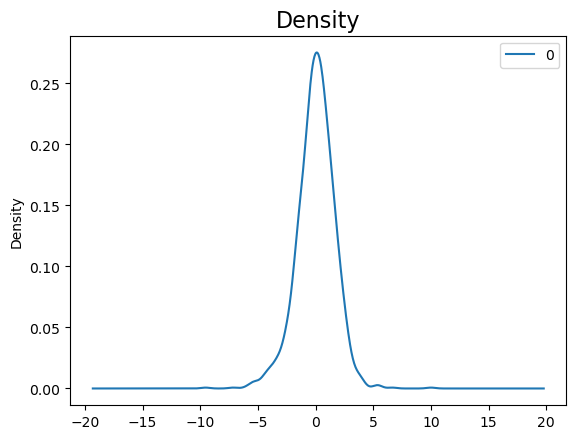

In [122]:
plt.figure(figsize=(18, 8))
residuals.plot(kind='kde', title='Density')
plt.title('Density', fontsize=16)
plt.show()

In [131]:
from scipy.stats import shapiro, kstest
residuals = residuals.reset_index()

<AxesSubplot: xlabel='0', ylabel='Count'>

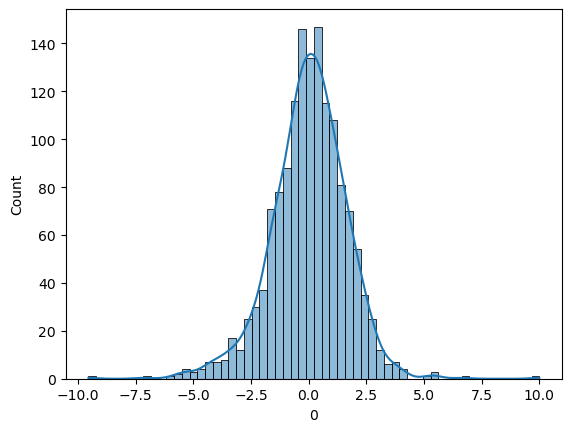

In [132]:
sns.histplot(residuals[0], kde=True)

In [137]:
train = df
test = pd.read_csv('./assets//DailyDelhiClimateTest.csv')
test = test.set_index("date")
test.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [163]:
train = df
test = pd.read_csv('./assets//DailyDelhiClimateTest.csv')
test["date"] = pd.to_datetime(test["date"])
test = test.set_index("date")

fc = model.get_forecast(test.index.max())
conf = fc.conf_int(alpha=0.05) # 95% confidence

fc_series = pd.Series(fc.predicted_mean, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)

In [165]:
fc_series

date
2017-01-01          NaN
2017-01-02    11.354415
2017-01-03    12.130205
2017-01-04    12.574566
2017-01-05    12.829089
                ...    
2017-04-20    13.170340
2017-04-21    13.170340
2017-04-22    13.170340
2017-04-23    13.170340
2017-04-24    13.170340
Name: predicted_mean, Length: 114, dtype: float64

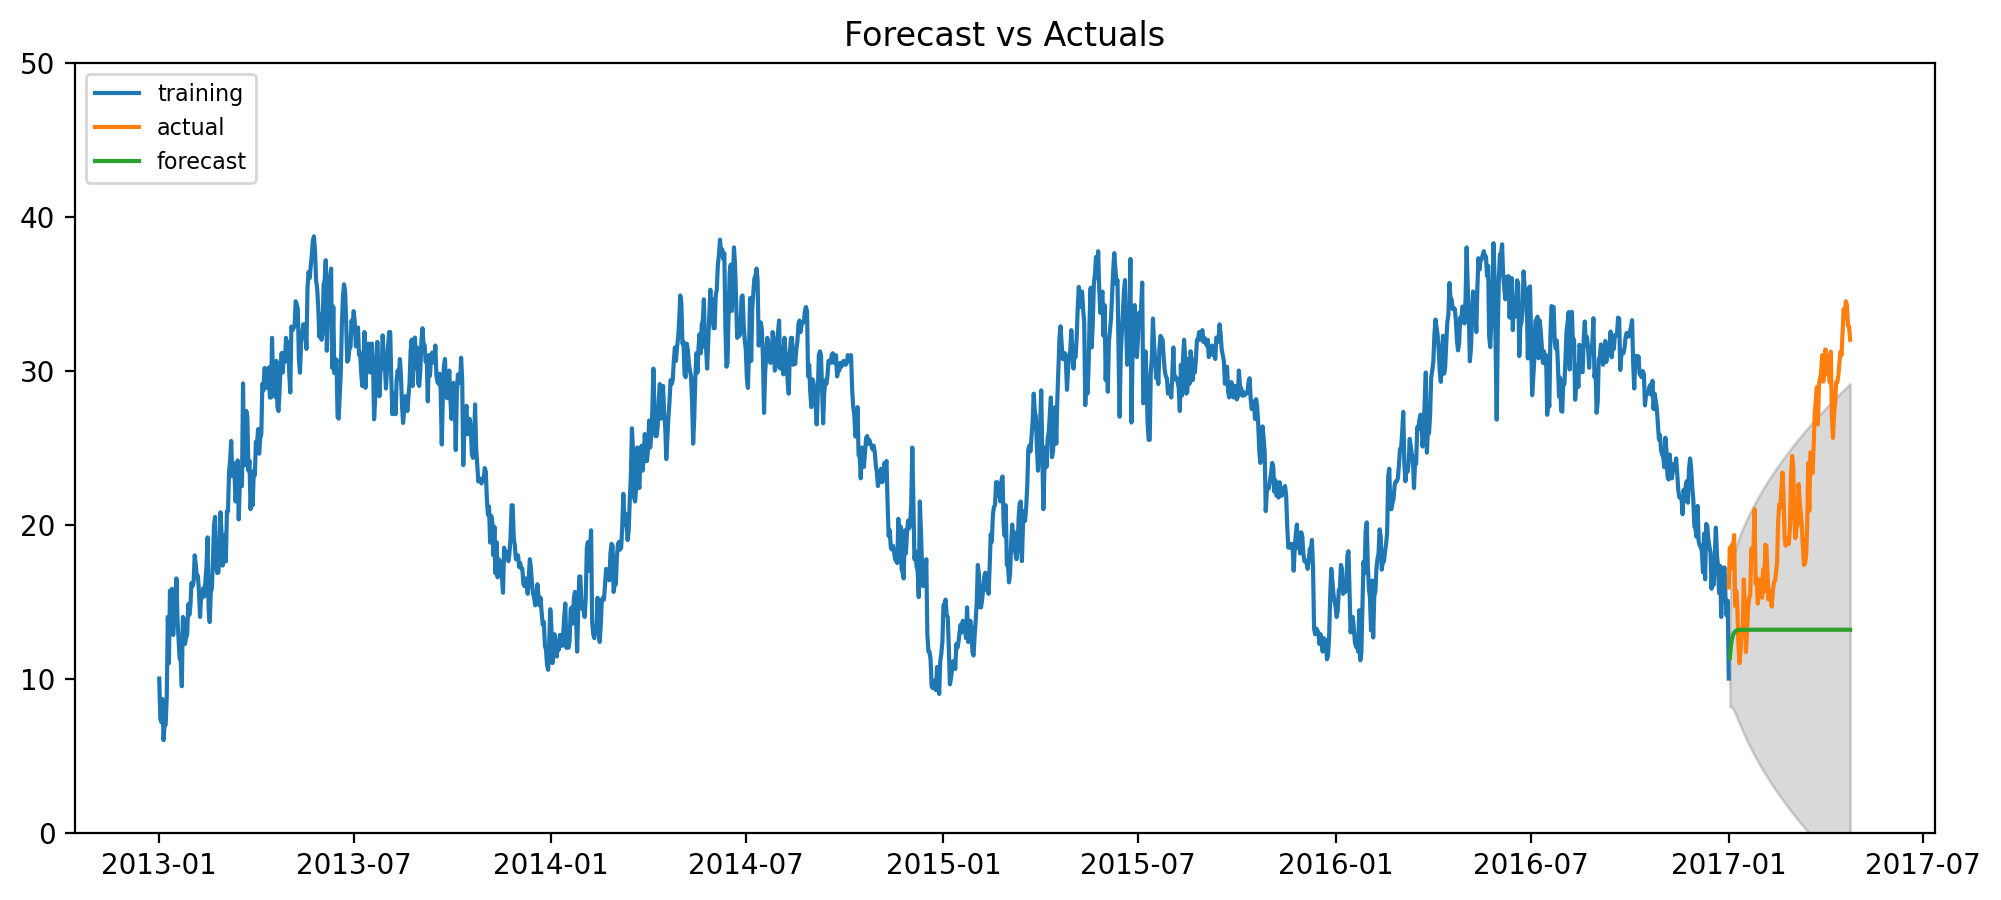

In [168]:
plt.figure(figsize=(12,5), dpi=200)

ax = plt.gca()
ax.set_ylim([0, 50])
#ax = df["meantemp"].plot(ax=ax)

plt.plot(train["meantemp"], label='training')
plt.plot(test["meantemp"], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()